# 1.この課題の目的
- セグメンテーションの精度を改善する
以下の要件をすべて満たしていた場合、合格とします。

※Jupyter Notebookを使い課題に沿った検証や説明ができている。

# 2.セグメンテーションの精度向上
前回に引き続きTGS Salt Identification Challengのデータセットの学習・推定を行います。

[TGS Salt Identification Challenge | Kaggle](https://www.kaggle.com/c/tgs-salt-identification-challenge)

# 【問題1】コードレビュー
転移学習を使用してセグメンテーションの精度を改善したコードを提示するので、レビューを行ってください。

## ◯Sprint20で使用した実装とは異なる点
## ①学習モデル定義の部分
### sprint20→[zhixuhao/unet: unet for image segmentation](https://github.com/zhixuhao/unet/blob/master/model.py)のmodel.pyに記載のunetメソッドを呼び出す形でモデルを定義

### sprint21(03-models_pretrained_and_more.ipynb)→[keras.applications.resnet50クラス](https://keras.io/ja/applications/#resnet50)をインポートし、unet_resnetメソッドの定義内でインスタンスを定義する事でモデルを定義

## 以下に詳細を記載

## sprint20の記載部分
### unetメソッド(model.py内に記載)

In [0]:
# def unet(pretrained_weights = None,input_size = (256,256,1)):
#     inputs = Input(input_size)
#     conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
#     conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
#     pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
#     conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
#     conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
#     pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
#     conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
#     conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
#     pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
#     conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
#     conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
#     drop4 = Dropout(0.5)(conv4)
#     pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

#     conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
#     conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
#     drop5 = Dropout(0.5)(conv5)

#     up6 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop5))
#     merge6 = concatenate([drop4,up6], axis = 3)
#     conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
#     conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)

#     up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
#     merge7 = concatenate([conv3,up7], axis = 3)
#     conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
#     conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)

#     up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
#     merge8 = concatenate([conv2,up8], axis = 3)
#     conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
#     conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)

#     up9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
#     merge9 = concatenate([conv1,up9], axis = 3)
#     conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
#     conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
#     conv9 = Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
#     conv10 = Conv2D(1, 1, activation = 'sigmoid')(conv9)

#     model = Model(input = inputs, output = conv10)

#     model.compile(optimizer = Adam(lr = 1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])
    
#     #model.summary()

#     if(pretrained_weights):
#     	model.load_weights(pretrained_weights)

#     return model


In [0]:
#  model = unet()

## sprint21の記載部分
### クラスインポート

In [0]:
# from keras.applications.resnet50 import ResNet50, preprocess_input # Resnet50モデルをインポート

### インスタンス定義(unet_resnetメソッドの内に記載)

In [0]:
#     base_model = ResNet50(
#         input_shape=input_size, 
#         include_top=False,
#         weights=weights)

### unet_resnetメソッド定義

In [0]:
# # Model is parametrized in a way to enable easy change of decoder_block type,
# # as this is an argument that can be given a function, like decoder_block_simple.
# # モデルはdecoder_blockタイプの簡単な変更を可能にするようにパラメータ化されています、
# # これは、decode_block_simpleのように、関数に与えることができる引数です。
# def unet_resnet(input_size, decoder_block,
#                 weights='imagenet',
#                 loss_func='binary_crossentropy',
#                 metrics_list=[my_iou_metric],
#                 use_lovash=False):

#     # Base model - encoder
#     base_model = ResNet50(
#         input_shape=input_size, 
#         include_top=False,
#         weights=weights)
    
#     # Layers for feature extraction in the encoder part
#     # エンコーダ部の特徴抽出用レイヤー
#     encoder1 = base_model.get_layer('activation_1').output
#     encoder2 = base_model.get_layer('activation_10').output
#     encoder3 = base_model.get_layer('activation_22').output
#     encoder4 = base_model.get_layer('activation_40').output
#     encoder5 = base_model.get_layer('activation_49').output

#     # Center block
#     center = decoder_block(
#         encoder5, 'center', num_filters=512)
#     concat5 = concatenate([center, encoder5], axis=-1)

#     # Decoder part.
#     # Every decoder block processed concatenated output from encoder and decoder part.
#     # This creates skip connections.
#     # Afterwards, decoder output is upsampled to dimensions equal to encoder output part.
#     #デコーダ部分。
#     # すべてのデコーダブロックは、エンコーダとデコーダ部分からの連結出力を処理します。
#     # これはスキップ接続を作成します。
#     # その後、デコーダの出力はエンコーダの出力部分と同じ次元にアップサンプリングされます    
    
#     decoder4 = decoder_block(
#         concat5, 'decoder4', num_filters=256)
#     concat4 = concatenate([UpSampling2D()(decoder4), encoder4], axis=-1)

#     decoder3 = decoder_block(
#         concat4, 'decoder3', num_filters=128)
#     concat3 = concatenate([UpSampling2D()(decoder3), encoder3], axis=-1)

#     decoder2 = decoder_block(
#         concat3, 'decoder2', num_filters=64)
#     concat2 = concatenate([UpSampling2D()(decoder2), encoder2], axis=-1)

#     decoder1 = decoder_block(
#         concat2, 'decoder1', num_filters=64)
#     concat1 = concatenate([UpSampling2D()(decoder1), encoder1], axis=-1)

#     # Final upsampling and decoder block for segmentation.
#     # セグメンテーションのための最終的なアップサンプリングとデコーダブロック。
#     output = UpSampling2D()(concat1)
#     output = decoder_block(
#         output, 'decoder_output', num_filters=32)
#     output = Conv2D(
#         1, (1, 1), activation=None, name='prediction')(output)
#     if not use_lovash:
#         output = Activation('sigmoid')(output)
        
#     model = Model(base_model.input, output)
#     model.compile(loss=loss_func, optimizer='adam', metrics=metrics_list)

#     return model

## ◯転移学習をどのように行っているか
### keras.application.resnet50クラスをインポートとし、unit_resnetメソッド内でbase_modelとして定義している
- 重みとバイアスは「imagenet」データセットで学習したデータセットを使用
- パラメータinclude_top=Falseとし、全結合層以外の層を使用

### resnet50をインポート

In [0]:
from keras.applications.resnet50 import ResNet50, preprocess_input # Resnet50モデルをインポート

### base_modelを設定

In [0]:
base_model = ResNet50(
    input_shape=input_size, 
    include_top=False,
    weights=weights)

## ◯U-Netのデコーダー部で位置情報を補完している部分はどのように行なっているか
### unet_resnetメソッド内でエンコーダーの各層の出力とデコーダーの各層の入力をconcentrateメソッドで結合する事で定義している

### unet_resnetメソッド内

In [0]:
    # エンコーダ部の特徴抽出用レイヤー
    encoder1 = base_model.get_layer('activation_1').output
    encoder2 = base_model.get_layer('activation_10').output
    encoder3 = base_model.get_layer('activation_22').output
    encoder4 = base_model.get_layer('activation_40').output
    encoder5 = base_model.get_layer('activation_49').output

    center = decoder_block(
        encoder5, 'center', num_filters=512)
    concat5 = concatenate([center, encoder5], axis=-1)

    #デコーダ部分。
    # すべてのデコーダブロックは、エンコーダとデコーダ部分からの連結出力を処理します。
    # これはスキップ接続を作成します。
    # その後、デコーダの出力はエンコーダの出力部分と同じ次元にアップサンプリングされます    
    
    decoder4 = decoder_block(
        concat5, 'decoder4', num_filters=256)
    concat4 = concatenate([UpSampling2D()(decoder4), encoder4], axis=-1)

    decoder3 = decoder_block(
        concat4, 'decoder3', num_filters=128)
    concat3 = concatenate([UpSampling2D()(decoder3), encoder3], axis=-1)

    decoder2 = decoder_block(
        concat3, 'decoder2', num_filters=64)
    concat2 = concatenate([UpSampling2D()(decoder2), encoder2], axis=-1)

    decoder1 = decoder_block(
        concat2, 'decoder1', num_filters=64)
    concat1 = concatenate([UpSampling2D()(decoder1), encoder1], axis=-1)

# 【問題2】コードの書き換え
エンコーダーにResNetが使用されていたコードをVGGに変更してください。

## Google Driveをマウント

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## tqdmクラスをインポート

In [0]:
!pip install tqdm

## 使用するクラスをインポート

In [0]:
import gc # ガーベジコレクションクラス
import glob # ファイル名を取得するクラス
import os # フォルダ移動f

import cv2 # open cv2クラスのインポート(画像編集をするクラス)
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split, StratifiedKFold
from tqdm import tqdm
from keras import optimizers
from keras.callbacks import *
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.layers import *
from keras.models import Model, load_model, save_model
from keras.preprocessing.image import array_to_img, img_to_array, load_img
from keras.applications.resnet50 import ResNet50, preprocess_input # Resnet50モデルをインポート

%matplotlib inline

## matplotlibで使用する際のフォントサイズを変更

In [0]:
# matplotlibで使用する際のフォントサイズを変更
plt.rcParams['figure.figsize'] = (12, 9)
# plt.style.use('ggplot')

## 使用するメソッドを定義

In [0]:
def compute_coverage(df, masks):
    
    df = df.copy()
    
    def cov_to_class(val):
        for i in range(0, 11):
            if val * 10 <= i:
                return i

    # クラスの対象面積の出力率
    df['coverage'] = np.mean(masks, axis=(1, 2))
    
    # 適用範囲はビンに分割する必要があります。そうしないと、
    # 各適用範囲は1回しか発生しないため、層別分割はできません。
    df['coverage_class'] = df.coverage.map(
        cov_to_class)

    return df


def create_depth_abs_channels(image_tensor):
    image_tensor = image_tensor.astype(np.float32)
    h, w, c = image_tensor.shape
    for row, const in enumerate(np.linspace(0, 1, h)):
        image_tensor[row, :, 1] = const
    image_tensor[:, :, 2] = (
        image_tensor[:, :, 0] * image_tensor[:, :, 1])

    x_dx = np.diff(image_tensor[:, :, 0], axis=0)
    x_dy = np.diff(image_tensor[:, :, 0], axis=1)
    x_dx = cv2.copyMakeBorder(x_dx, 1, 0, 0, 0, cv2.BORDER_CONSTANT, 0)
    x_dy = cv2.copyMakeBorder(x_dy, 0, 0, 1, 0, cv2.BORDER_CONSTANT, 0)
    image_tensor[:, :, 1] = np.abs(x_dx + x_dy)

    return image_tensor

## データ読み込み

In [0]:
os.chdir('/content/drive/My Drive/Colab Notebooks/sprint20/tgs-salt-identification-challenge')

In [0]:
train = pd.read_csv('train.csv')
test = pd.read_csv('sample_submission.csv')
depth = pd.read_csv('depths.csv')

train_src = 'train/'

print('train:\n{}'.format(train.head()))
print('\ntest:\n{}'.format(test.head()))


train = train.merge(depth, how='left', on='id')
test = test.merge(depth, how='left', on='id')

print('\n{}'.format(train.head()))

train:
           id                                           rle_mask
0  575d24d81d                                                NaN
1  a266a2a9df                                          5051 5151
2  75efad62c1  9 93 109 94 210 94 310 95 411 95 511 96 612 96...
3  34e51dba6a  48 54 149 54 251 53 353 52 455 51 557 50 659 4...
4  4875705fb0  1111 1 1212 1 1313 1 1414 1 1514 2 1615 2 1716...

test:
           id rle_mask
0  155410d6fa      1 1
1  78b32781d1      1 1
2  63db2a476a      1 1
3  17bfcdb967      1 1
4  7ea0fd3c88      1 1

           id                                           rle_mask    z
0  575d24d81d                                                NaN  843
1  a266a2a9df                                          5051 5151  794
2  75efad62c1  9 93 109 94 210 94 310 95 411 95 511 96 612 96...  468
3  34e51dba6a  48 54 149 54 251 53 353 52 455 51 557 50 659 4...  727
4  4875705fb0  1111 1 1212 1 1313 1 1414 1 1514 2 1615 2 1716...  797


## 画像とマスクを読み込み、ランダムサンプルを確認

In [0]:
os.getcwd()

'/content/drive/My Drive/Colab Notebooks/sprint20/tgs-salt-identification-challenge'

In [0]:
os.chdir('/content/drive/My Drive/Colab Notebooks/sprint20/unet-master/data/salt/train')

In [0]:
X_train = np.asarray(
    [cv2.imread('./images/{}.png'.format(x), 0) for x in train.id.tolist()], 
    dtype=np.uint8) / 255.
y_train = np.asarray(
    [cv2.imread('./masks/{}.png'.format(x), 0) for x in train.id.tolist()],
    dtype=np.uint8) / 255.

print(X_train.shape, y_train.shape)

(4000, 101, 101) (4000, 101, 101)


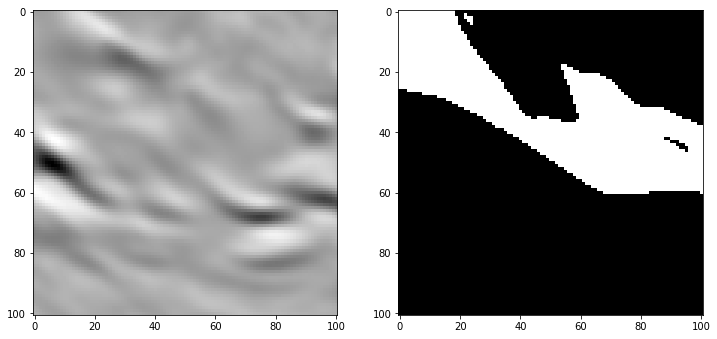

In [0]:
random_index = np.random.randint(0, X_train.shape[0])

fig, ax = plt.subplots(1, 2)

ax[0].imshow(X_train[random_index], cmap='gray')
ax[1].imshow(y_train[random_index], cmap='gray')

## トレーニングデータの作成

In [0]:
train = compute_coverage(train, y_train)

In [0]:
kfold = StratifiedKFold(n_splits=5, random_state=1337)

# チャンネル機能を追加する
X_train_ch = np.repeat(np.expand_dims(X_train, axis=-1), 3, -1)
X_train_ch = np.asarray(list(map(lambda x: create_depth_abs_channels(x), X_train_ch)))

# 224×224、デフォルトのResNet50画像サイズにサイズ変更
X_resized = np.asarray(list(map(lambda x: cv2.resize(x, (224, 224)), X_train_ch)))
y_resized = np.asarray(list(map(lambda x: cv2.resize(x, (224, 224)), y_train)))


for train_index, valid_index in kfold.split(train.id.values, train.coverage_class.values):
    
    X_tr, X_val = X_resized[train_index], X_resized[valid_index]
    y_tr, y_val = y_resized[train_index], y_resized[valid_index]
    
    break
    

y_tr = np.expand_dims(y_tr, axis=-1)
y_val = np.expand_dims(y_val, axis=-1)

print(X_tr.shape, y_tr.shape)
print(X_val.shape, y_val.shape)


del X_train_ch, y_resized
del X_resized
gc.collect()

(3196, 224, 224, 3) (3196, 224, 224, 1)
(804, 224, 224, 3) (804, 224, 224, 1)


935

## 損失関数・測定基準の設定

In [0]:
from keras.losses import binary_crossentropy

# ダイス&組み合わせ
def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred = K.cast(y_pred, 'float32')
    y_pred_f = K.cast(K.greater(K.flatten(y_pred), 0.5), 'float32')
    intersection = y_true_f * y_pred_f
    score = 2. * K.sum(intersection) / (K.sum(y_true_f) + K.sum(y_pred_f))
    return score


def dice_loss(y_true, y_pred):
    smooth = 1.
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = y_true_f * y_pred_f
    score = (2. * K.sum(intersection) + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)
    return 1. - score


def bce_dice_loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) + dice_loss(y_true, y_pred)


def bce_logdice_loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) - K.log(1. - dice_loss(y_true, y_pred))



def lovasz_grad(gt_sorted):
    gts = tf.reduce_sum(gt_sorted)
    intersection = gts - tf.cumsum(gt_sorted)
    union = gts + tf.cumsum(1. - gt_sorted)
    jaccard = 1. - intersection / union
    jaccard = tf.concat((jaccard[0:1], jaccard[1:] - jaccard[:-1]), 0)
    return jaccard


# --------------------------- BINARY LOSSES ---------------------------

def lovasz_hinge(logits, labels, per_image=True, ignore=None):

    if per_image:
        def treat_image(log_lab):
            log, lab = log_lab
            log, lab = tf.expand_dims(log, 0), tf.expand_dims(lab, 0)
            log, lab = flatten_binary_scores(log, lab, ignore)
            return lovasz_hinge_flat(log, lab)
        losses = tf.map_fn(treat_image, (logits, labels), dtype=tf.float32)
        loss = tf.reduce_mean(losses)
    else:
        loss = lovasz_hinge_flat(*flatten_binary_scores(logits, labels, ignore))
    return loss


def lovasz_hinge_flat(logits, labels):

    def compute_loss():
        labelsf = tf.cast(labels, logits.dtype)
        signs = 2. * labelsf - 1.
        errors = 1. - logits * tf.stop_gradient(signs)
        errors_sorted, perm = tf.nn.top_k(errors, k=tf.shape(errors)[0], name="descending_sort")
        gt_sorted = tf.gather(labelsf, perm)
        grad = lovasz_grad(gt_sorted)
        loss = tf.tensordot(tf.nn.relu(errors_sorted), tf.stop_gradient(grad), 1, name="loss_non_void")
        return loss

    loss = tf.cond(tf.equal(tf.shape(logits)[0], 0),
                   lambda: tf.reduce_sum(logits) * 0.,
                   compute_loss,
                   strict=True,
                   name="loss"
                   )
    return loss


def flatten_binary_scores(scores, labels, ignore=None):
    scores = tf.reshape(scores, (-1,))
    labels = tf.reshape(labels, (-1,))
    if ignore is None:
        return scores, labels
    valid = tf.not_equal(labels, ignore)
    vscores = tf.boolean_mask(scores, valid, name='valid_scores')
    vlabels = tf.boolean_mask(labels, valid, name='valid_labels')
    return vscores, vlabels


def lovasz_loss(y_true, y_pred):
    y_true, y_pred = K.cast(K.squeeze(y_true, -1), 'int32'), K.cast(K.squeeze(y_pred, -1), 'float32')
    #logits = K.log(y_pred / (1. - y_pred))
    logits = y_pred #Jiaxin
    loss = lovasz_hinge(logits, y_true, per_image = True, ignore = None)
    return loss

def get_iou_vector(A, B):
    # Numpy version    
    batch_size = A.shape[0]
    metric = 0.0
    for batch in range(batch_size):
        t, p = A[batch], B[batch]
        true = np.sum(t)
        pred = np.sum(p)
        
        if true == 0:
            metric += (pred == 0)
            continue
            
        # unionがからではないケース
        intersection = np.sum(t * p)
        union = true + pred - intersection
        iou = intersection / union
        
        # IoU metricは0.5を超える実際のIoUの近似値
        iou = np.floor(max(0, (iou - 0.45)*20)) / 10
        
        metric += iou
        
    # バッチサイズで平均を計算
    metric /= batch_size
    return metric


def my_iou_metric(label, pred):
    return tf.py_func(get_iou_vector, [label, pred>0.5], tf.float64)


# For Lovash loss
def my_iou_metric_2(label, pred):
    return tf.py_func(get_iou_vector, [label, pred >0], tf.float64)

## デコーダー部

In [0]:
# 畳み込み層、バッチノーマライゼーション、PReLU層を導入したデコーダブロック
def decoder_block_simple(
        layer_name, block_name,
        num_filters=32,
        conv_dim=(3, 3)):

    x_dec = Conv2D(
        num_filters, conv_dim,
        padding='same',
        name='{}_conv'.format(block_name))(layer_name)
    x_dec = BatchNormalization(
        name='{}_bn'.format(block_name))(x_dec)
    x_dec = PReLU(
        name='{}_activation'.format(block_name))(x_dec)

    return x_dec

#ボトルネックアーキテクチャの＃Decoderブロック、どこでconv層
# は、表現を圧縮するために、最初と最後の半分のサイズです。
# この種のアーキテクチャは最も有用な情報を保持するはずです。
def decoder_block_bottleneck(
        layer_name, block_name,
        num_filters=32,
        conv_dim=(3, 3),
        dropout_frac=0.2):

    x_dec = Conv2D(
        num_filters, conv_dim,
        padding='same',
        name='{}_conv1'.format(block_name))(layer_name)
    x_dec = BatchNormalization(
        name='{}_bn1'.format(block_name))(x_dec)
    x_dec = PReLU(
        name='{}_activation1'.format(block_name))(x_dec)
    x_dec = Dropout(dropout_frac)(x_dec)

    x_dec2 = Conv2D(
        num_filters // 2, conv_dim,
        padding='same',
        name='{}_conv2'.format(block_name))(x_dec)
    x_dec2 = BatchNormalization(
        name='{}_bn2'.format(block_name))(x_dec2)
    x_dec2 = PReLU(
        name='{}_activation2'.format(block_name))(x_dec2)
    x_dec2 = Dropout(dropout_frac)(x_dec2)

    x_dec2 = Conv2D(
        num_filters, conv_dim,
        padding='same',
        name='{}_conv3'.format(block_name))(x_dec2)
    x_dec2 = BatchNormalization(
        name='{}_bn3'.format(block_name))(x_dec2)
    x_dec2 = PReLU(
        name='{}_activation3'.format(block_name))(x_dec2)
    x_dec2 = Dropout(dropout_frac)(x_dec2)

    x_dec2 = Add()([x_dec, x_dec2])

    return x_dec2

## モデル定義
### エンコーダー部にResNet50を使用したモデル(default)

In [0]:
# # Model is parametrized in a way to enable easy change of decoder_block type,
# # as this is an argument that can be given a function, like decoder_block_simple.
# # モデルはdecoder_blockタイプの簡単な変更を可能にするようにパラメータ化されています、
# # これは、decode_block_simpleのように、関数に与えることができる引数です。
# def unet_resnet(input_size, decoder_block,
#                 weights='imagenet',
#                 loss_func='binary_crossentropy',
#                 metrics_list=[my_iou_metric],
#                 use_lovash=False):

#     # Base model - encoder
#     base_model = ResNet50(
#         input_shape=input_size, 
#         include_top=False,
#         weights=weights)
    
#     # Layers for feature extraction in the encoder part
#     # エンコーダ部の特徴抽出用レイヤー
#     encoder1 = base_model.get_layer('activation_1').output
#     encoder2 = base_model.get_layer('activation_10').output
#     encoder3 = base_model.get_layer('activation_22').output
#     encoder4 = base_model.get_layer('activation_40').output
#     encoder5 = base_model.get_layer('activation_49').output

#     # Center block
#     center = decoder_block(
#         encoder5, 'center', num_filters=512)
#     concat5 = concatenate([center, encoder5], axis=-1)

#     # Decoder part.
#     # Every decoder block processed concatenated output from encoder and decoder part.
#     # This creates skip connections.
#     # Afterwards, decoder output is upsampled to dimensions equal to encoder output part.
#     #デコーダ部分。
#     # すべてのデコーダブロックは、エンコーダとデコーダ部分からの連結出力を処理します。
#     # これはスキップ接続を作成します。
#     # その後、デコーダの出力はエンコーダの出力部分と同じ次元にアップサンプリングされます    
    
#     decoder4 = decoder_block(
#         concat5, 'decoder4', num_filters=256)
#     concat4 = concatenate([UpSampling2D()(decoder4), encoder4], axis=-1)

#     decoder3 = decoder_block(
#         concat4, 'decoder3', num_filters=128)
#     concat3 = concatenate([UpSampling2D()(decoder3), encoder3], axis=-1)

#     decoder2 = decoder_block(
#         concat3, 'decoder2', num_filters=64)
#     concat2 = concatenate([UpSampling2D()(decoder2), encoder2], axis=-1)

#     decoder1 = decoder_block(
#         concat2, 'decoder1', num_filters=64)
#     concat1 = concatenate([UpSampling2D()(decoder1), encoder1], axis=-1)

#     # Final upsampling and decoder block for segmentation.
#     # セグメンテーションのための最終的なアップサンプリングとデコーダブロック。
#     output = UpSampling2D()(concat1)
#     output = decoder_block(
#         output, 'decoder_output', num_filters=32)
#     output = Conv2D(
#         1, (1, 1), activation=None, name='prediction')(output)
#     if not use_lovash:
#         output = Activation('sigmoid')(output)
        
#     model = Model(base_model.input, output)
#     model.compile(loss=loss_func, optimizer='adam', metrics=metrics_list)

#     return model

### エンコーダ部をResNet50からVGG16に変更したモデル(問題2)

### VGG16クラスをインポート

In [0]:
from keras.applications.vgg16 import VGG16, preprocess_input

### モデルを定義

In [0]:
# モデルはdecoder_blockタイプの簡単な変更を可能にするようにパラメータ化されています、
# これは、decode_block_simpleのように、関数に与えることができる引数です。
def unet_VGG16(input_size, decoder_block,
                weights='imagenet',
                loss_func='binary_crossentropy',
                metrics_list=[my_iou_metric],
                use_lovash=False):

    # エンコーダーのベース
    base_model = VGG16(
        input_shape=input_size, 
        include_top=False,
        weights=weights)
    
    # エンコーダ部の特徴抽出用レイヤー
    encoder1 = base_model.get_layer('block1_conv2').output
    encoder2 = base_model.get_layer('block2_conv2').output
    encoder3 = base_model.get_layer('block3_conv3').output
    encoder4 = base_model.get_layer('block4_conv3').output
    encoder5 = base_model.get_layer('block5_conv3').output
    
    # Center block
    center = decoder_block(
        encoder5, 'center', num_filters=512)
    concat5 = concatenate([center, encoder5], axis=-1)

    #デコーダ部分。
    # すべてのデコーダブロックは、エンコーダとデコーダ部分からの連結出力を処理します。
    # これはスキップ接続を作成します。
    # その後、デコーダの出力はエンコーダの出力部分と同じ次元にアップサンプリングされます    
    
    decoder4 = decoder_block(
        concat5, 'decoder4', num_filters=256)
    concat4 = concatenate([UpSampling2D()(decoder4), encoder4], axis=-1)

    decoder3 = decoder_block(
        concat4, 'decoder3', num_filters=128)
    concat3 = concatenate([UpSampling2D()(decoder3), encoder3], axis=-1)

    decoder2 = decoder_block(
        concat3, 'decoder2', num_filters=64)
    concat2 = concatenate([UpSampling2D()(decoder2), encoder2], axis=-1)

    decoder1 = decoder_block(
        concat2, 'decoder1', num_filters=64)
    concat1 = concatenate([UpSampling2D()(decoder1), encoder1], axis=-1)

    # セグメンテーションのための最終的なアップサンプリングとデコーダブロック。
    output = UpSampling2D()(concat1)
    output = decoder_block(
        output, 'decoder_output', num_filters=32)
    output = Conv2D(
        1, (1, 1), activation=None, name='prediction')(output)
    if not use_lovash:
        output = Activation('sigmoid')(output)
        
    model = Model(base_model.input, output)
    model.compile(loss=loss_func, optimizer='adam', metrics=metrics_list)

    return model

## モデルを確認

In [0]:
input_size = (224, 224, 3)

K.clear_session()

model = unet_VGG16(input_size, decoder_block_simple, weights='imagenet')

model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 224, 224, 64) 1792        input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, 224, 224, 64) 36928       block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_pool (MaxPooling2D)      (None, 112, 112, 64) 0           block1_conv2[0][0]               
__________________________________________________________________________________________________
block2_con

## VGG16を使用したモデルで学習
### epochs = 10、batch_size = 10

In [0]:
K.clear_session()

model_depth = unet_resnet(
    input_size, decoder_block_bottleneck, weights='imagenet',
    loss_func=bce_dice_loss, metrics_list=[my_iou_metric],
    use_lovash=False)
print(model_depth.summary())


model_checkpoint = ModelCheckpoint(
    'unet_VGG16.h5' ,monitor='val_my_iou_metric', mode='max',
    save_best_only=True, save_weights_only=True, verbose=1)
reduce_lr = ReduceLROnPlateau(
    monitor='val_my_iou_metric',
    mode='max',
    factor=0.5, 
    patience=5, 
    min_lr=0.0001, 
    verbose=1)


epochs = 10  # 25
batch_size = 10

history = model_depth.fit(X_tr, y_tr,
                    validation_data=[X_val, y_val], 
                    epochs=epochs,
                    batch_size=batch_size,
                    callbacks=[model_checkpoint,reduce_lr], 
                    verbose=1)

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

## 予測

In [0]:
val_preds = model_depth.predict(X_val, batch_size=16)

y_val_pred = np.asarray(list(map(lambda x: cv2.resize(x, (101, 101)), val_preds)))
y_val_true = np.asarray(list(map(lambda x: cv2.resize(x, (101, 101)), y_val)))

In [ ]:
y_val_pred

### Threshold optimization: 
### しきい値最適化

In [0]:
def iou_metric(y_true_in, y_pred_in, print_table=False):
    labels = y_true_in
    y_pred = y_pred_in
    
    true_objects = 2
    pred_objects = 2

    intersection = np.histogram2d(labels.flatten(), y_pred.flatten(), bins=(true_objects, pred_objects))[0]

    # 計算領域（すべてのオブジェクト間の結合を見つけるために必要）
    area_true = np.histogram(labels, bins = true_objects)[0]
    area_pred = np.histogram(y_pred, bins = pred_objects)[0]
    area_true = np.expand_dims(area_true, -1)
    area_pred = np.expand_dims(area_pred, 0)

    # 正解エリアと予測エリアを合わせた面積を計算
    union = area_true + area_pred - intersection

    # 背景を除外
    intersection = intersection[1:,1:]
    union = union[1:,1:]
    union[union == 0] = 1e-9

    # IoUの計算
    iou = intersection / union

    def precision_at(threshold, iou):
        matches = iou > threshold
        true_positives = np.sum(matches, axis=1) == 1   
        false_positives = np.sum(matches, axis=0) == 0 
        false_negatives = np.sum(matches, axis=1) == 0 
        tp, fp, fn = np.sum(true_positives), np.sum(false_positives), np.sum(false_negatives)
        return tp, fp, fn

    prec = []
    if print_table:
        print("Thresh\tTP\tFP\tFN\tPrec.")
    for t in np.arange(0.5, 1.0, 0.05):
        tp, fp, fn = precision_at(t, iou)
        if (tp + fp + fn) > 0:
            p = tp / (tp + fp + fn)
        else:
            p = 0
        if print_table:
            print("{:1.3f}\t{}\t{}\t{}\t{:1.3f}".format(t, tp, fp, fn, p))
        prec.append(p)
    
    if print_table:
        print("AP\t-\t-\t-\t{:1.3f}".format(np.mean(prec)))
    return np.mean(prec)

def iou_metric_batch(y_true_in, y_pred_in):
    batch_size = y_true_in.shape[0]
    metric = []
    for batch in range(batch_size):
        value = iou_metric(y_true_in[batch], y_pred_in[batch])
        metric.append(value)
    return np.mean(metric)

In [0]:
# Non-Maximum Suppressionの閾値の範囲
thresholds = np.arange(0.2, 0.9, 0.02)

# 閾値を超える値は1とし、それ以外は0としする。
# 閾値をループし、上記のIoU関数に基づいてしきい値のIoUを計算.
ious = np.array([iou_metric_batch(y_val_true,
                            np.int32(y_val_pred > threshold)) for threshold in tqdm(thresholds)])

100%|██████████| 35/35 [00:36<00:00,  1.04s/it]


In [0]:
df_iou = pd.DataFrame(thresholds, columns=['threshold'])
df_iou['iou'] = ious

# 最も大きな値の時のIoUと閾値を表示
best_index = df_iou['iou'].idxmax()
print('Best IoU: {:.4f} at threshold: {:.3f}'.format(
    df_iou.iou[best_index], df_iou.threshold[best_index]))

df_iou.describe()

Best IoU: 0.6068 at threshold: 0.880


,threshold,iou
count,35.000000,35.000000
mean,0.540000,0.518408
std,0.204939,0.054013
min,0.200000,0.422388
25%,0.370000,0.472512
50%,0.540000,0.521144
75%,0.710000,0.565485
max,0.880000,0.606841


## 閾値を超えたIoU値

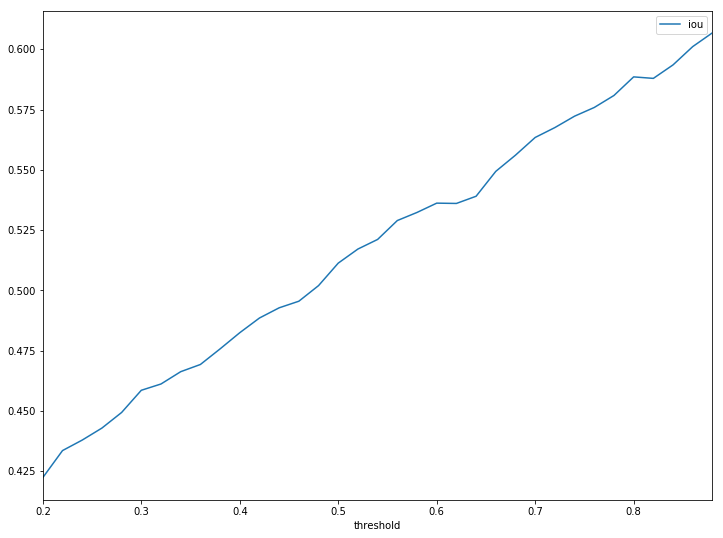

In [0]:
# Plot IoU values over threshold range.
df_iou.plot(x='threshold', y='iou')

# 【問題3】学習・推定
ResNetとVGG双方のコードで学習・推定を行い、結果を比較してください。

## 比較結果

|   model   | UNet +ResNet | UNet +VGG16 |
|:---------:|:------------:|:-----------:|
|  Best IoU |    0.6799    |    0.6068   |
| threshold |     0.76     |     0.88    |

### UNet+ResNetモデルの方がBest IoUが高い
#### 想定される要因
- ResNetの方がVGG16に比較し、層が深い為、正確に特徴抽出が出来ている？
- Resnet→152層　VGG16→18層(プーリング層、活性化関数層を含む)

### UNet+VGG16モデルの方がthresholdが高い
#### threshold→物体の領域候補である重なった複数の短形から、最適な１つの短形を決定するNon Maximum Suppressionアルゴリズムで使用される閾値



## プログラム
## Resnetを使用したモデルの学習・推定

In [0]:
# モデルはdecoder_blockタイプの簡単な変更を可能にするようにパラメータ化されています、
# これは、decode_block_simpleのように、関数に与えることができる引数です。
def unet_resnet(input_size, decoder_block,
                weights='imagenet',
                loss_func='binary_crossentropy',
                metrics_list=[my_iou_metric],
                use_lovash=False):

    # エンコーダーのベース
    base_model = ResNet50(
        input_shape=input_size, 
        include_top=False,
        weights=weights)
    
    # エンコーダ部の特徴抽出用レイヤー
    encoder1 = base_model.get_layer('activation_1').output
    encoder2 = base_model.get_layer('activation_10').output
    encoder3 = base_model.get_layer('activation_22').output
    encoder4 = base_model.get_layer('activation_40').output
    encoder5 = base_model.get_layer('activation_49').output

    center = decoder_block(
        encoder5, 'center', num_filters=512)
    concat5 = concatenate([center, encoder5], axis=-1)

    #デコーダ部分。
    # すべてのデコーダブロックは、エンコーダとデコーダ部分からの連結出力を処理し
    # スキップ接続を作成
    # その後、デコーダの出力はエンコーダの出力部分と同じ次元にアップサンプリング 
    
    decoder4 = decoder_block(
        concat5, 'decoder4', num_filters=256)
    concat4 = concatenate([UpSampling2D()(decoder4), encoder4], axis=-1)

    decoder3 = decoder_block(
        concat4, 'decoder3', num_filters=128)
    concat3 = concatenate([UpSampling2D()(decoder3), encoder3], axis=-1)

    decoder2 = decoder_block(
        concat3, 'decoder2', num_filters=64)
    concat2 = concatenate([UpSampling2D()(decoder2), encoder2], axis=-1)

    decoder1 = decoder_block(
        concat2, 'decoder1', num_filters=64)
    concat1 = concatenate([UpSampling2D()(decoder1), encoder1], axis=-1)

    # セグメンテーションのための最終的なアップサンプリングとデコーダブロック。
    output = UpSampling2D()(concat1)
    output = decoder_block(
        output, 'decoder_output', num_filters=32)
    output = Conv2D(
        1, (1, 1), activation=None, name='prediction')(output)
    if not use_lovash:
        output = Activation('sigmoid')(output)
        
    model = Model(base_model.input, output)
    model.compile(loss=loss_func, optimizer='adam', metrics=metrics_list)

    return model

### 作成したモデルを調べる：

In [0]:
input_size = (224, 224, 3)

K.clear_session()
model = unet_resnet(
    input_size, decoder_block_simple, weights='imagenet')
model.summary()

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

### 学習モデル

In [0]:
K.clear_session()

model_depth = unet_resnet(
    input_size, decoder_block_bottleneck, weights='imagenet',
    loss_func=bce_dice_loss, metrics_list=[my_iou_metric],
    use_lovash=False)
print(model_depth.summary())


model_checkpoint = ModelCheckpoint(
    'unet_resnet.h5' ,monitor='val_my_iou_metric', mode='max',
    save_best_only=True, save_weights_only=True, verbose=1)
reduce_lr = ReduceLROnPlateau(
    monitor='val_my_iou_metric',
    mode='max',
    factor=0.5, 
    patience=5, 
    min_lr=0.0001, 
    verbose=1)


epochs = 10  # 25
batch_size = 10

history = model_depth.fit(X_tr, y_tr,
                    validation_data=[X_val, y_val], 
                    epochs=epochs,
                    batch_size=batch_size,
                    callbacks=[model_checkpoint,reduce_lr], 
                    verbose=1)

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

### 検証セットの予測と元のサイズへのサイズ変更

In [0]:
val_preds = model_depth.predict(X_val, batch_size=16)

y_val_pred = np.asarray(list(map(lambda x: cv2.resize(x, (101, 101)), val_preds)))
y_val_true = np.asarray(list(map(lambda x: cv2.resize(x, (101, 101)), y_val)))

### 閾値の適正化

In [0]:
def iou_metric(y_true_in, y_pred_in, print_table=False):
    labels = y_true_in
    y_pred = y_pred_in
    
    true_objects = 2
    pred_objects = 2

    intersection = np.histogram2d(labels.flatten(), y_pred.flatten(), bins=(true_objects, pred_objects))[0]

    # 計算領域（すべてのオブジェクト間の結合を見つけるために必要）
    area_true = np.histogram(labels, bins = true_objects)[0]
    area_pred = np.histogram(y_pred, bins = pred_objects)[0]
    area_true = np.expand_dims(area_true, -1)
    area_pred = np.expand_dims(area_pred, 0)

    # 正解エリアと予測エリアを合わせた面積を計算
    union = area_true + area_pred - intersection

    # 背景を除外
    intersection = intersection[1:,1:]
    union = union[1:,1:]
    union[union == 0] = 1e-9

    # IoUの計算
    iou = intersection / union

    def precision_at(threshold, iou):
        matches = iou > threshold
        true_positives = np.sum(matches, axis=1) == 1  
        false_positives = np.sum(matches, axis=0) == 0 
        false_negatives = np.sum(matches, axis=1) == 0  
        tp, fp, fn = np.sum(true_positives), np.sum(false_positives), np.sum(false_negatives)
        return tp, fp, fn

    prec = []
    if print_table:
        print("Thresh\tTP\tFP\tFN\tPrec.")
    for t in np.arange(0.5, 1.0, 0.05):
        tp, fp, fn = precision_at(t, iou)
        if (tp + fp + fn) > 0:
            p = tp / (tp + fp + fn)
        else:
            p = 0
        if print_table:
            print("{:1.3f}\t{}\t{}\t{}\t{:1.3f}".format(t, tp, fp, fn, p))
        prec.append(p)
    
    if print_table:
        print("AP\t-\t-\t-\t{:1.3f}".format(np.mean(prec)))
    return np.mean(prec)

def iou_metric_batch(y_true_in, y_pred_in):
    batch_size = y_true_in.shape[0]
    metric = []
    for batch in range(batch_size):
        value = iou_metric(y_true_in[batch], y_pred_in[batch])
        metric.append(value)
    return np.mean(metric)

In [0]:
# Non-Maximum Suppressionの閾値の範囲
thresholds = np.arange(0.2, 0.9, 0.02)

# 閾値を超える値は1とし、それ以外は0としする。
# 閾値をループし、上記のIoU関数に基づいてしきい値のIoUを計算.
ious = np.array([iou_metric_batch(y_val_true,
                            np.int32(y_val_pred > threshold)) for threshold in tqdm(thresholds)])

100%|██████████| 35/35 [00:36<00:00,  1.04s/it]


In [0]:
df_iou = pd.DataFrame(thresholds, columns=['threshold'])
df_iou['iou'] = ious

# 最も大きな値の時のIoUと閾値を表示
best_index = df_iou['iou'].idxmax()
print('Best IoU: {:.4f} at threshold: {:.3f}'.format(
    df_iou.iou[best_index], df_iou.threshold[best_index]))

df_iou.describe()

Best IoU: 0.6799 at threshold: 0.760


,threshold,iou
count,35.000000,35.000000
mean,0.540000,0.640156
std,0.204939,0.037274
min,0.200000,0.549005
25%,0.370000,0.611443
50%,0.540000,0.650995
75%,0.710000,0.671891
max,0.880000,0.679851


## 閾値を超えたIoU値

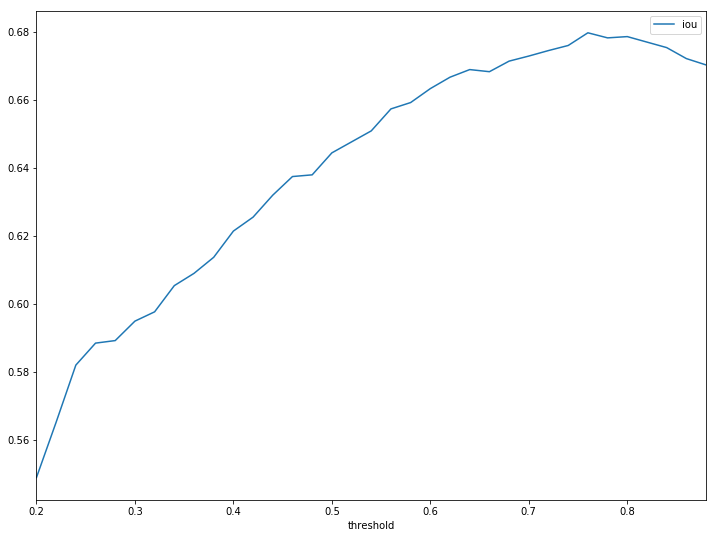

In [0]:
df_iou.plot(x='threshold', y='iou')